Import Libraries

In [31]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read in html page from [Basketball Reference](https://www.sports-reference.com/cbb/play-index/matchup_finder.cgi?request=1&year_min=1950&year_max=2022&school_id=duke&opp_id=north-carolina&game_type=A&game_month=&game_location=&game_result=&is_overtime=&comp_school=le&comp_opp=le&rank_school=ANY&rank_opp=ANY&order_by=date_game&order_by_asc=&offset=0)

In [32]:
url = "https://www.sports-reference.com/cbb/play-index/matchup_finder.cgi?request=1&year_min=1950&year_max=2022&school_id=duke&opp_id=north-carolina&game_type=A&game_month=&game_location=&game_result=&is_overtime=&comp_school=le&comp_opp=le&rank_school=ANY&rank_opp=ANY&order_by=date_game&order_by_asc=&offset=0"
page = requests.get(url)
page # <Response [200]> indicates a successful server response


<Response [200]>

In [33]:
page.content

b'\n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/cbb/deploy/www" itemscope itemtype="https://schema.org/WebSite" lang="en" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://d2p3bygnnzw9w3.cloudfront.net/req/202202171" />\n    <!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->\n<script type="text/javascript" async=true>\n    (function() {\n\tvar host = window.location.hostname;\n\tvar element = document.createElement(\'script\');\n\tvar firstScript = document.getElementsByTagName(\'script\')[0];\n\tvar url = \'https://quantcast.mgr.consensu.org\'\n\t    .concat(\'/choice/\', \'XwNYEpNeFfhfr\', \'/\', host, \'/choice.js\')\n\tvar uspTries = 0;\n\tvar uspTriesLimit = 3;\n\telement.async = true;\n\telement.type = \'text/javascript\';\n\telement.src = url;\n\t

Use BeautifulSoup to extract the data

In [34]:
soup = BeautifulSoup(page.content, 'html.parser')
# Find all HTML table elements on our page - how do we find which HTML elements to look for? 
table = soup.find_all('table')[0] 
# print(table.prettify())

In [35]:
df_raw = pd.read_html(str(table))[0]
df_raw.head()

,Year,Date,Unnamed: 2,Schl,Rk.,Unnamed: 5,Opp,Rk..1,Unnamed: 8,Unnamed: 9,PTS,OPP,MOV,Unnamed: 13,OT
0,2021-22,2022-03-05,NaN,Duke,4,NaN,North Carolina,NaN,L,NaN,81,94,-13,NaN,NaN
1,2021-22,2022-02-05,NaN,Duke,9,@,North Carolina,NaN,W,NaN,87,67,20,NaN,NaN
2,2020-21,2021-03-06,NaN,Duke,NaN,@,North Carolina,NaN,L,NaN,73,91,-18,NaN,NaN
3,2020-21,2021-02-06,NaN,Duke,NaN,NaN,North Carolina,NaN,L,NaN,87,91,-4,NaN,NaN
4,2019-20,2020-03-07,NaN,Duke,12,NaN,North Carolina,NaN,W,NaN,89,76,13,NaN,NaN


Clean Data

In [36]:
# Drop unneeded columns and rows
df_clean = df_raw.drop(columns=['Unnamed: 2', 'Unnamed: 9', 'Unnamed: 13', 'Schl', 'Opp'])
df_clean = df_clean[df_clean['Year'] != 'Year']

# Rename columns
df_clean = df_clean.rename(columns={'Rk.': 'Duke Rank', 
                        'Unnamed: 5': 'Home Team',
                        'Rk..1': 'UNC Rank', 
                        'Unnamed: 8': 'Winning Team',
                        'PTS': 'Duke Points',
                        'OPP': 'UNC Points',
                        })

# Make columns that should be numeric, numeric
df_clean[['Duke Rank', 'UNC Rank', 'Duke Points', 'UNC Points', 'MOV', 'OT']] = df_clean[['Duke Rank', 'UNC Rank', 'Duke Points', 'UNC Points', 'MOV', 'OT']].astype(float)

# Fix Variables
df_clean['Home Team'] = df_clean['Home Team'].replace({None: 'Duke', '@': 'UNC'})
df_clean['Winning Team'] = df_clean['Winning Team'].replace({'W':'Duke', 'L': 'UNC'})
df_clean['OT'] = df_clean['OT'].replace({None: 0})
df_clean['MOV'] = df_clean['MOV'].abs()

df_clean

,Year,Date,Duke Rank,Home Team,UNC Rank,Winning Team,Duke Points,UNC Points,MOV,OT
0,2021-22,2022-03-05,4.0,Duke,NaN,UNC,81.0,94.0,13.0,NaN
1,2021-22,2022-02-05,9.0,UNC,NaN,Duke,87.0,67.0,20.0,NaN
2,2020-21,2021-03-06,NaN,UNC,NaN,UNC,73.0,91.0,18.0,NaN
3,2020-21,2021-02-06,NaN,Duke,NaN,UNC,87.0,91.0,4.0,NaN
4,2019-20,2020-03-07,12.0,Duke,NaN,Duke,89.0,76.0,13.0,NaN
...,...,...,...,...,...,...,...,...,...,...
99,1981-82,1982-01-16,NaN,Duke,1.0,UNC,63.0,73.0,10.0,NaN
100,1980-81,1981-02-28,NaN,Duke,11.0,Duke,66.0,65.0,1.0,1.0
101,1980-81,1981-01-17,NaN,UNC,17.0,UNC,65.0,80.0,15.0,NaN
102,1980-81,1980-12-05,NaN,Duke,10.0,UNC,76.0,78.0,2.0,NaN


Exploratory Analysis



In [37]:
# Note these values are only for games after 1979
unc_max_points = max(df_clean['UNC Points'])
print(f'The max number of points UNC has scored against Duke is... {unc_max_points}')

duke_max_points = max(df_clean['Duke Points'])
print(f'The max number of points Duke has scored against UNC is... {duke_max_points}')

max_differential = max(df_clean['MOV'])
print(f'The max point differential was... {max_differential}')

The max number of points UNC has scored against Duke is... 105.0
The max number of points Duke has scored against UNC is... 100.0
The max point differential was... 32.0


Visuals

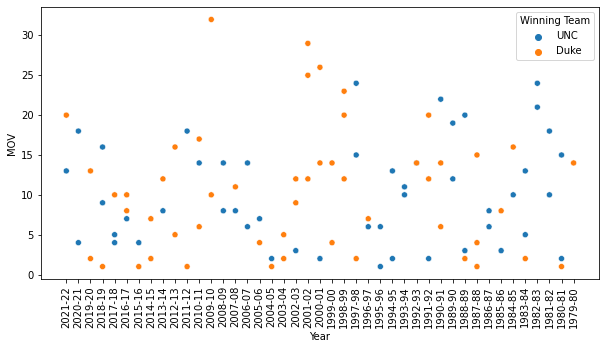

In [38]:
# Point differential over time
plt.figure(figsize = (10,5))
ax = sns.scatterplot(data=df_clean, x="Year", y="MOV", hue="Winning Team")
plt.xticks(rotation=90)
plt.show()

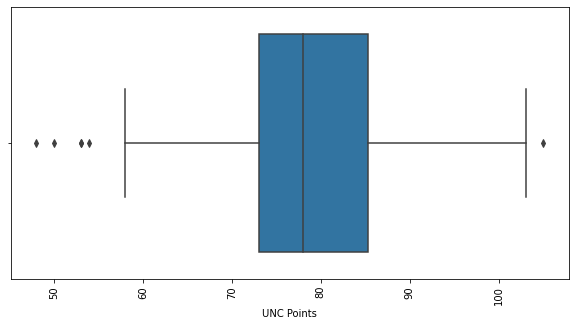

In [39]:
# Distribution of UNC's points
plt.figure(figsize = (10,5))
ax = sns.boxplot(x=df_clean["UNC Points"])
plt.xticks(rotation=90)
plt.show()

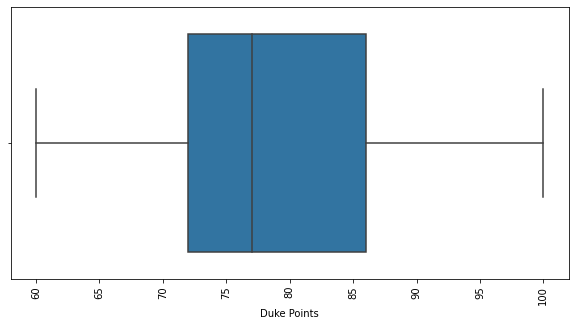

In [40]:
# Distribution of Duke's Points
plt.figure(figsize = (10,5))
ax = sns.boxplot(x=df_clean["Duke Points"])
plt.xticks(rotation=90)
plt.show()

Probabilities

In [41]:
# Chance of UNC winning if the game goes to overtime

# Find games that have gone to OT
overtime = df_clean['OT'] > 0 
df_overtime = df_clean.where(overtime).dropna()
# Out of these, how many has UNC won
prob = len(df_overtime[df_overtime['Winning Team'] == "UNC"]) / len(df_overtime)

print(f'UNC has won {prob:.2f} games - but the sample size is too small!')
df_overtime

UNC has won 0.33 games - but the sample size is too small!


,Year,Date,Duke Rank,Home Team,UNC Rank,Winning Team,Duke Points,UNC Points,MOV,OT
18,2014-15,2015-02-18,4.0,Duke,15.0,Duke,92.0,90.0,2.0,1.0
43,2003-04,2004-02-05,1.0,UNC,17.0,Duke,83.0,81.0,2.0,1.0
94,1983-84,1984-03-03,15.0,UNC,1.0,UNC,83.0,96.0,13.0,2.0


In [42]:
# Chance of home team winning 

# Find games where home team wins
df_home_wins = df_clean[df_clean['Home Team'] == df_clean['Winning Team']]
# Out of all the games, what proportion did the home team win
prob = len(df_home_wins) / len(df_clean)
print(f'Home team has won {prob:.2f} games!')

Home team has won 0.57 games!
